# Le Convolutional Neural Net (Teoria)

In [3]:
from IPython.display import Image

Parlando di immagini i dati non sono più monodimensionali, ma bidimensionali. Per essere più precisi l'immagine costruita dai pc è composta dalla sovrapposizione di 3 colori: Red, Green e Blue (RGB).

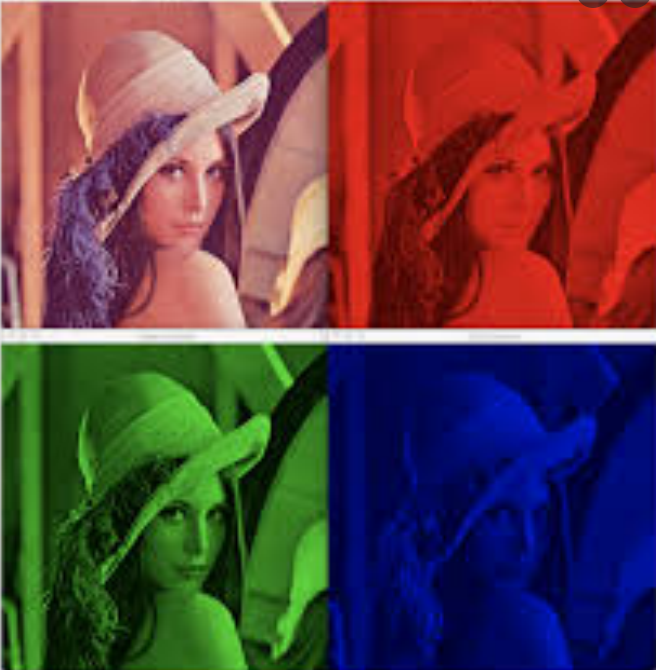

In [4]:
Image('RGB_Image.png')

Quindi le reti convoluzionali operano su tensori 3D: altezza, larghezza e canali.

Anche nel caso di un'immagine in bianco e nero, spesso non è monocromatica bensì in scala di grigi.

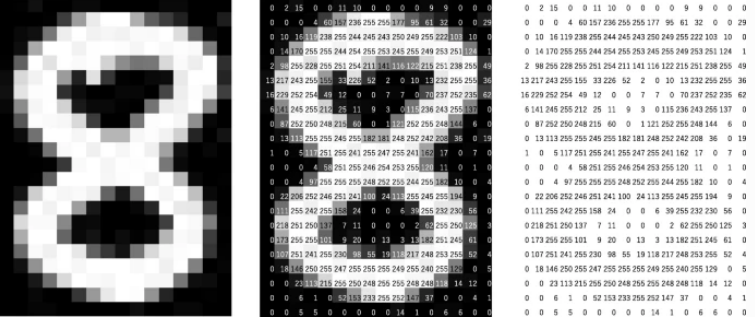

In [5]:
Image('Esempio_Immagine_ScalaGrigi.png')

La particolarità delle CNN è che, diversamente dai layer Densi, sono in grado di individuare pattern locali.

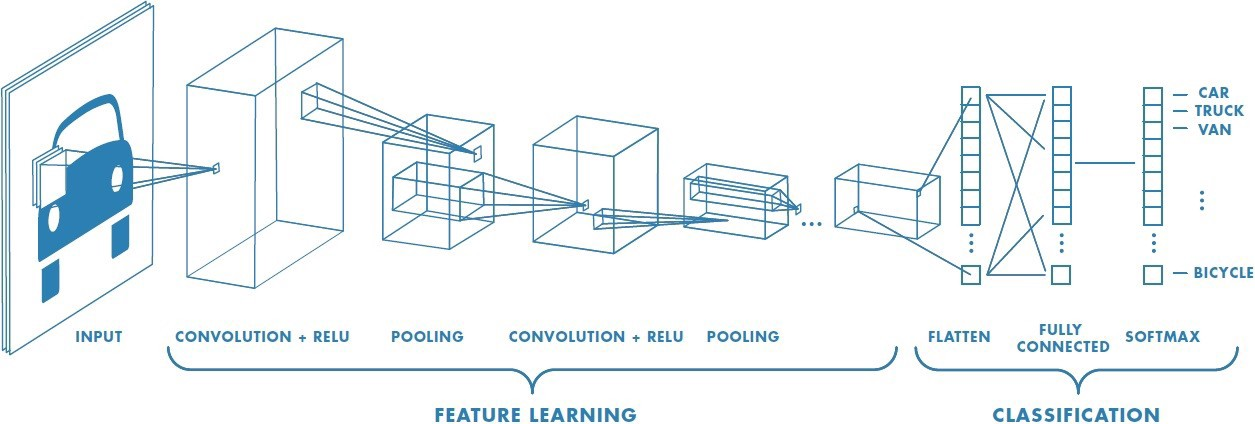

In [6]:
Image('CNN Steps.jpeg')

# Gerarchia

Per manipolare le reti convoluzionali ci sono 2 parametri chiave:
1. le dimensioni del pattern (kernel)
2. la profondità della mappa delle caratteristiche di output (filtri)

### Il kernel

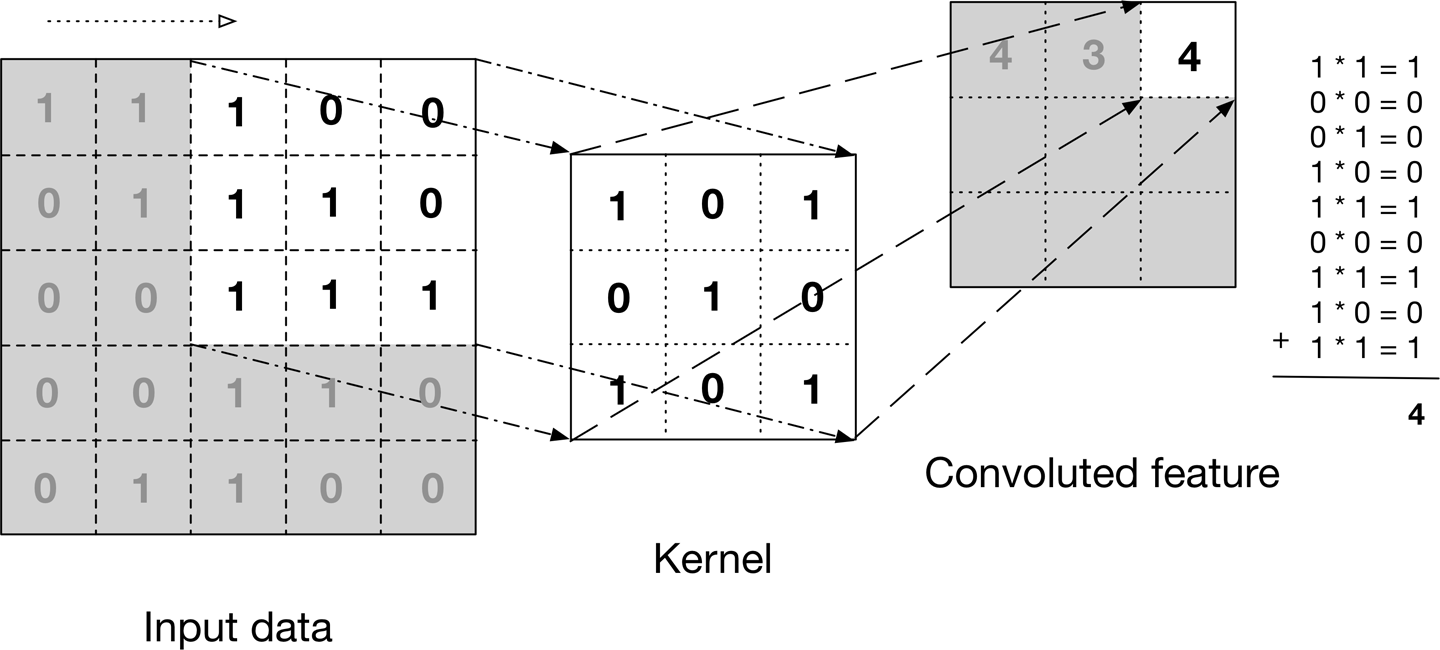

In [7]:
# Immaginiamo che i valori siano solo 0 e 1 (No scala di grigi)

Image('Calcolo CNN.png')

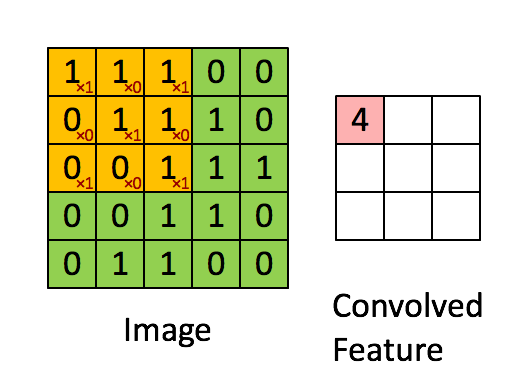

In [8]:
Image('Convolution_schematic.gif')

I kernel sono piccole finestre che scorrono lungo l'immagine per estrarre, ad ogni step, delle patch 3D.

### Il padding

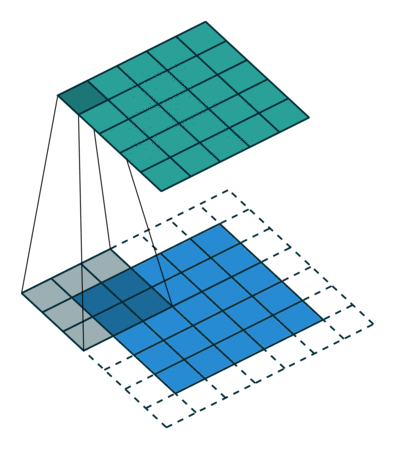

In [9]:
Image('Kernel Padding.gif')

### Lo stride

Riguarda gli step (orizzontale e verticale) di spostamento del filtro.

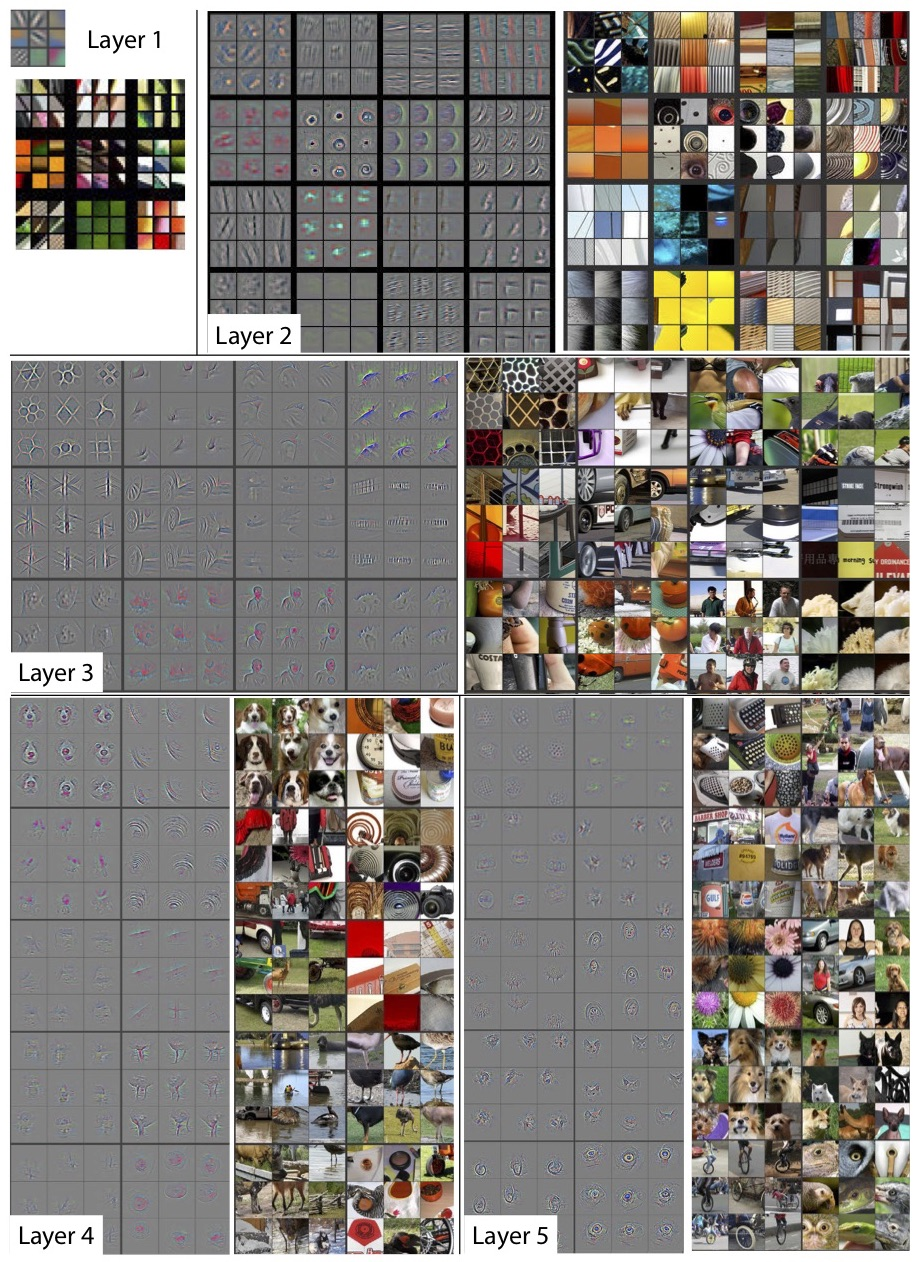

In [10]:
Image('neural-networks-layers-visualization.jpg')

### Il max-pooling

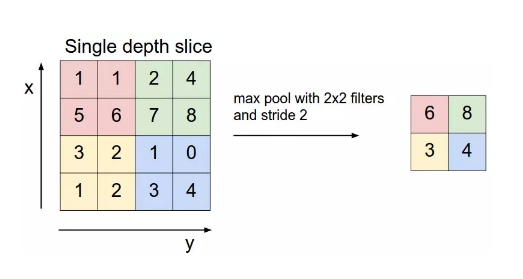

In [11]:
Image('Max Pooling.png')

### Riepilogo

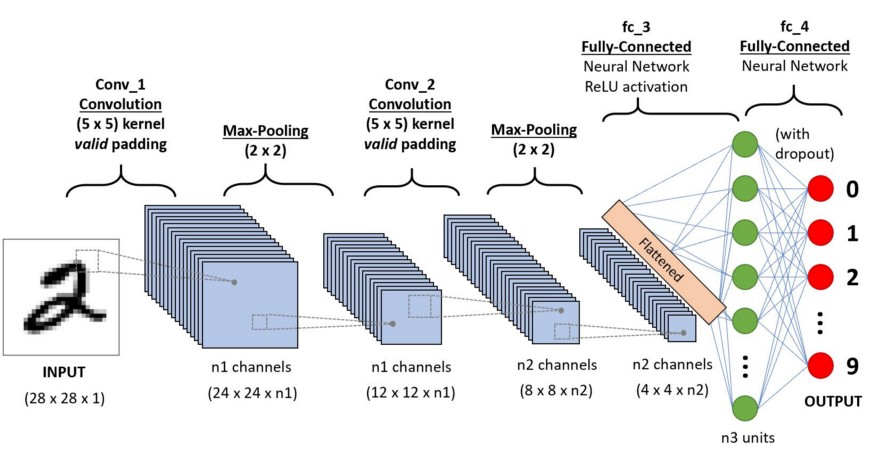

In [12]:
Image('CCN Net Struttura.jpeg')

In [1]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import os

In [2]:
# tf.__version__

In [3]:
# for fname in os.listdir('data/train/cats'):
# #     print(fname)
#     pass

In [4]:
# import pathlib
# import IPython.display as display
# from PIL import Image
# import matplotlib.pyplot as plt

In [5]:
# data_dir = 'data'
# data_dir = pathlib.Path(data_dir)

In [6]:
# train_data_dir = 'data/train'
# train_data_dir = pathlib.Path(train_data_dir)
# train_data_dir

In [7]:
# test_data_dir = 'data/test'
# test_data_dir = pathlib.Path(test_data_dir)

In [8]:
# image_count = len(list(data_dir.glob('*/*/*.jpg')))
# image_count

In [20]:
#[print(item.name) for item in data_dir.glob('train/*')]

In [9]:
# ClassNames = np.array([item.name for item in data_dir.glob('train/*')])
# ClassNames

In [10]:
# gatti = list(data_dir.glob('train/cats/*'))
# gatti[:3]

In [23]:
# for gatto in gatti[:3]:
#    display.display(Image.open(str(gatto)))

In [11]:
# image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# image_generator


# ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

In [12]:
# BatchSize = 64
# ImgHeight = 224
# ImgWidth = 224
# StepsPerEpoch = np.ceil(image_count/BatchSize)
# StepsPerEpoch

In [13]:
# train_data_gen = image_generator.flow_from_directory(directory=str(train_data_dir), 
#                                                     color_mode = 'grayscale',
#                                                     batch_size=BatchSize,
#                                                     shuffle=True,
# #                                                     label_mode='binary',
#                                                     target_size=(ImgHeight, ImgWidth),
#                                                     classes=list(ClassNames)
#                                                     )

In [14]:
# def showBatch(imageBatch, labelBatch):
#     plt.figure(figsize=(10,10))
#     for n in range(25):
#         ax = plt.subplot(5,5,n+1)
#         plt.imshow(imageBatch[n])
#         plt.title(ClassNames[labelBatch[n]==1][0].title())
#         plt.axis('off')

In [15]:
# image_batch, label_batch = next(train_data_gen)
# showBatch(image_batch, label_batch)

In [16]:
# listTrainDataset = tf.data.Dataset.list_files(str(train_data_dir/'*/*'))

In [17]:
# for f in listTrainDataset.take(5):
#     print(f.numpy())

In [18]:
# def get_label(file_path):
#     # convert the path to a list of path components
#     parts = tf.strings.split(file_path, os.path.sep)
#     # the second to the last is the class-directory
#     return parts[-2] == ClassNames

In [19]:
# ClassNames

In [20]:
# get_label('data/train/cats/cat.826.jpg')

In [21]:
# def decode_img(img):
#     # convert the compressed string to a 3D uint8 tensor
#     img = tf.image.decode_jpeg(img, channels=1) #3
    
#     # use 'convert_image_dtype' to convert to floats in the [0,1] range.
#     img = tf.image.convert_image_dtype(img, tf.float32)
    
#     # resize
#     return tf.image.resize(img, [ImgHeight, ImgWidth])

In [22]:
# def process_path(file_path):
    
#     label = get_label(file_path)
    
#     # load the raw data from the file as a string
#     img = tf.io.read_file(file_path)
#     img = decode_img(img)
    
#     return img, label

In [56]:
# Use Dataset.map to create a dataset of image, label pairs

In [23]:
# labeledDataset = listTrainDataset.map(process_path, 
#                                       num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [24]:
# for image, label in labeledDataset.take(5):
#     print("Image shape", image.numpy().shape)
#     print("Label", label.numpy())
#     #print("Image shape", image.numpy())
    

In [25]:
# test = labeledDataset.batch(32)
# test

In [26]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
# from tensorflow.keras.preprocessing.image  import ImageDataGenerator

In [27]:
# data, label = next(train_data_gen)
# label.shape

In [28]:
# model = Sequential([
#     Conv2D(64, 
#            kernel_size = 3, 
#            padding = 'same', 
#            activation = 'relu', 
#            input_shape=(ImgHeight, ImgWidth,1)), #3
#     MaxPooling2D(),
#         Conv2D(128, 
#            kernel_size = 3, 
#            padding = 'same', 
#            activation = 'relu'),
#     MaxPooling2D(),
#         Conv2D(64, 
#            kernel_size = 3, 
#            padding = 'same', 
#            activation = 'relu'),
#     Flatten(),
#     Dense(units = 512, activation = 'relu'),
#     Dropout(rate = 0.25),
#     Dense(2, activation = 'sigmoid')
# ])

In [29]:
# model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [30]:
# model.summary()

In [31]:
# history = model.fit(train_data_gen,   # qui usare Dense(2) oppure bin_cross
#                              steps_per_epoch=10, 
#                              epochs=100)

In [ ]:
# history = model.fit(labeledDataset.batch(32), epochs=10)